In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset, date2num, num2date
%matplotlib inline

In [2]:
xds= xr.open_dataset('/srv/data1/particleTrack_GLORYS/partTracking/ROMS_partTrack/subDailyOutput/particleTracks.nc')

In [3]:
xds

<xarray.Dataset>
Dimensions:   (time: 504, pid: 16)
Coordinates:
  * time      (time) datetime64[ns] 2018-03-12 2018-03-12 ... 2018-04-02
  * pid       (pid) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
Data variables: (12/20)
    xpos      (time, pid) float64 ...
    ypos      (time, pid) float64 ...
    zpos      (time, pid) float64 ...
    uo        (time, pid) float64 ...
    vo        (time, pid) float64 ...
    wo        (time, pid) float64 ...
    ...        ...
    pres      (time, pid) float64 ...
    dx_pres   (time, pid) float64 ...
    dy_pres   (time, pid) float64 ...
    thetao    (time, pid) float64 ...
    so        (time, pid) float64 ...
    f         (time, pid) float64 ...

In [4]:
x = xds['xpos'].to_numpy()
y = xds['ypos'].to_numpy()
z = xds['z_rho'].to_numpy()

uo = xds['uo'].to_numpy()
vo = xds['vo'].to_numpy()
wo = xds['wo'].to_numpy()
# dz_uo = xds['dz_uo'].to_numpy()
# dz_vo = xds['dz_vo'].to_numpy()
# dz_wo = xds['dz_wo'].to_numpy()

p = xds['pres'].to_numpy()
dx_p = xds['dx_pres'].to_numpy()
dy_p = xds['dy_pres'].to_numpy()

# dx_z = xds['dx_z'].to_numpy()
# dy_z = xds['dy_z'].to_numpy()

rho = xds['rho'].to_numpy()
#dz_pres_z = -rho * 9.81

f = xds['f'].to_numpy()
xds.close()

In [5]:
y.shape,vo.shape, wo.shape

((504, 16), (504, 16), (504, 16))

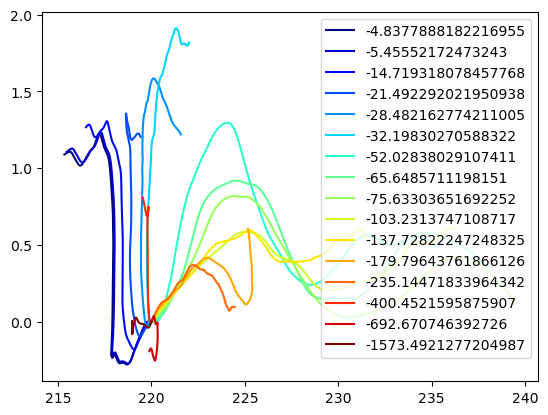

In [6]:
colors = plt.cm.jet(np.linspace(0,1,x.shape[1]))
for i in range(x.shape[1]):
    plt.plot(x[:,i],y[:,i], label = z[0,i], color=colors[i])
plt.legend()
#plt.scatter(x,y, c=p, s=1)

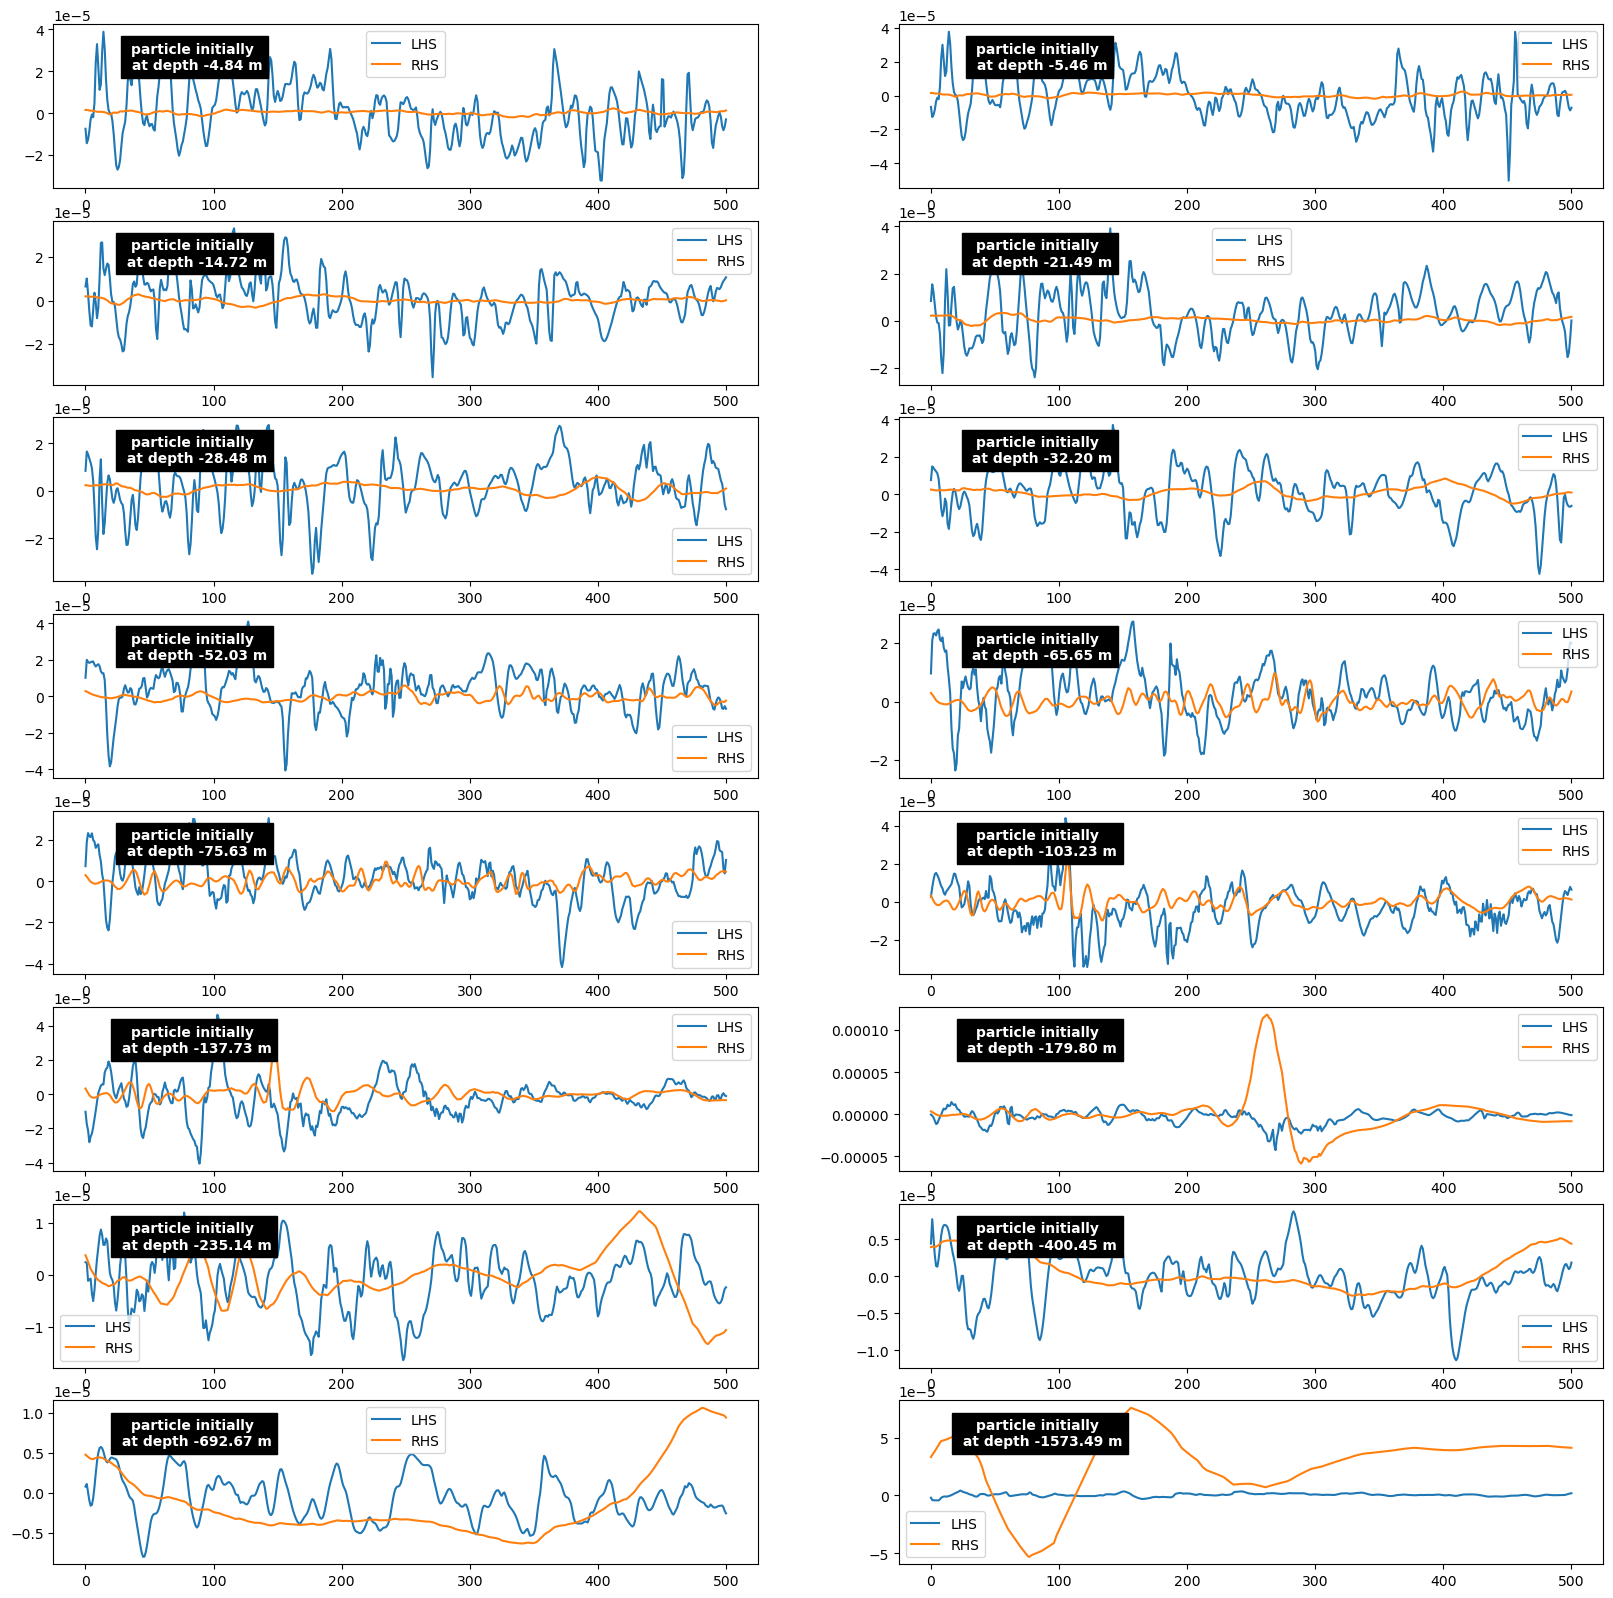

In [7]:
D_Dt_u = (np.roll(uo,-1,axis=0) - np.roll(uo,1,axis=0))[1:-1,:]/(3600*1/4)

presXgrad = -1/rho * (dx_p) 
xCoriolis = -f*vo
RHS =  presXgrad + xCoriolis 
RHS = RHS[1:-1,:]

#RHS = (np.roll(RHS,-1,axis=0) + RHS)[1:-1,:]/2
strtindx = 0
endindx = -1
fig, axes = plt.subplots(nrows = 8, ncols=2, figsize = (20,20) )
for i in range(16):
    ii = int(i//2)
    jj = i%2
    ax = axes[ii,jj]
    ax.plot(D_Dt_u[strtindx:endindx,i], label = 'LHS')
    ax.plot(RHS[strtindx:endindx,i], label = 'RHS')
    text = f'particle initially \n at depth {z[0,i]:5.2f} m'
    fig_x, fig_y = 0.2, 0.8
    ax.text(fig_x, fig_y, text, color ='white', horizontalalignment='center',
            weight='heavy', verticalalignment='center', transform=ax.transAxes,
            bbox=dict(facecolor='black', alpha=1))
    ax.legend()

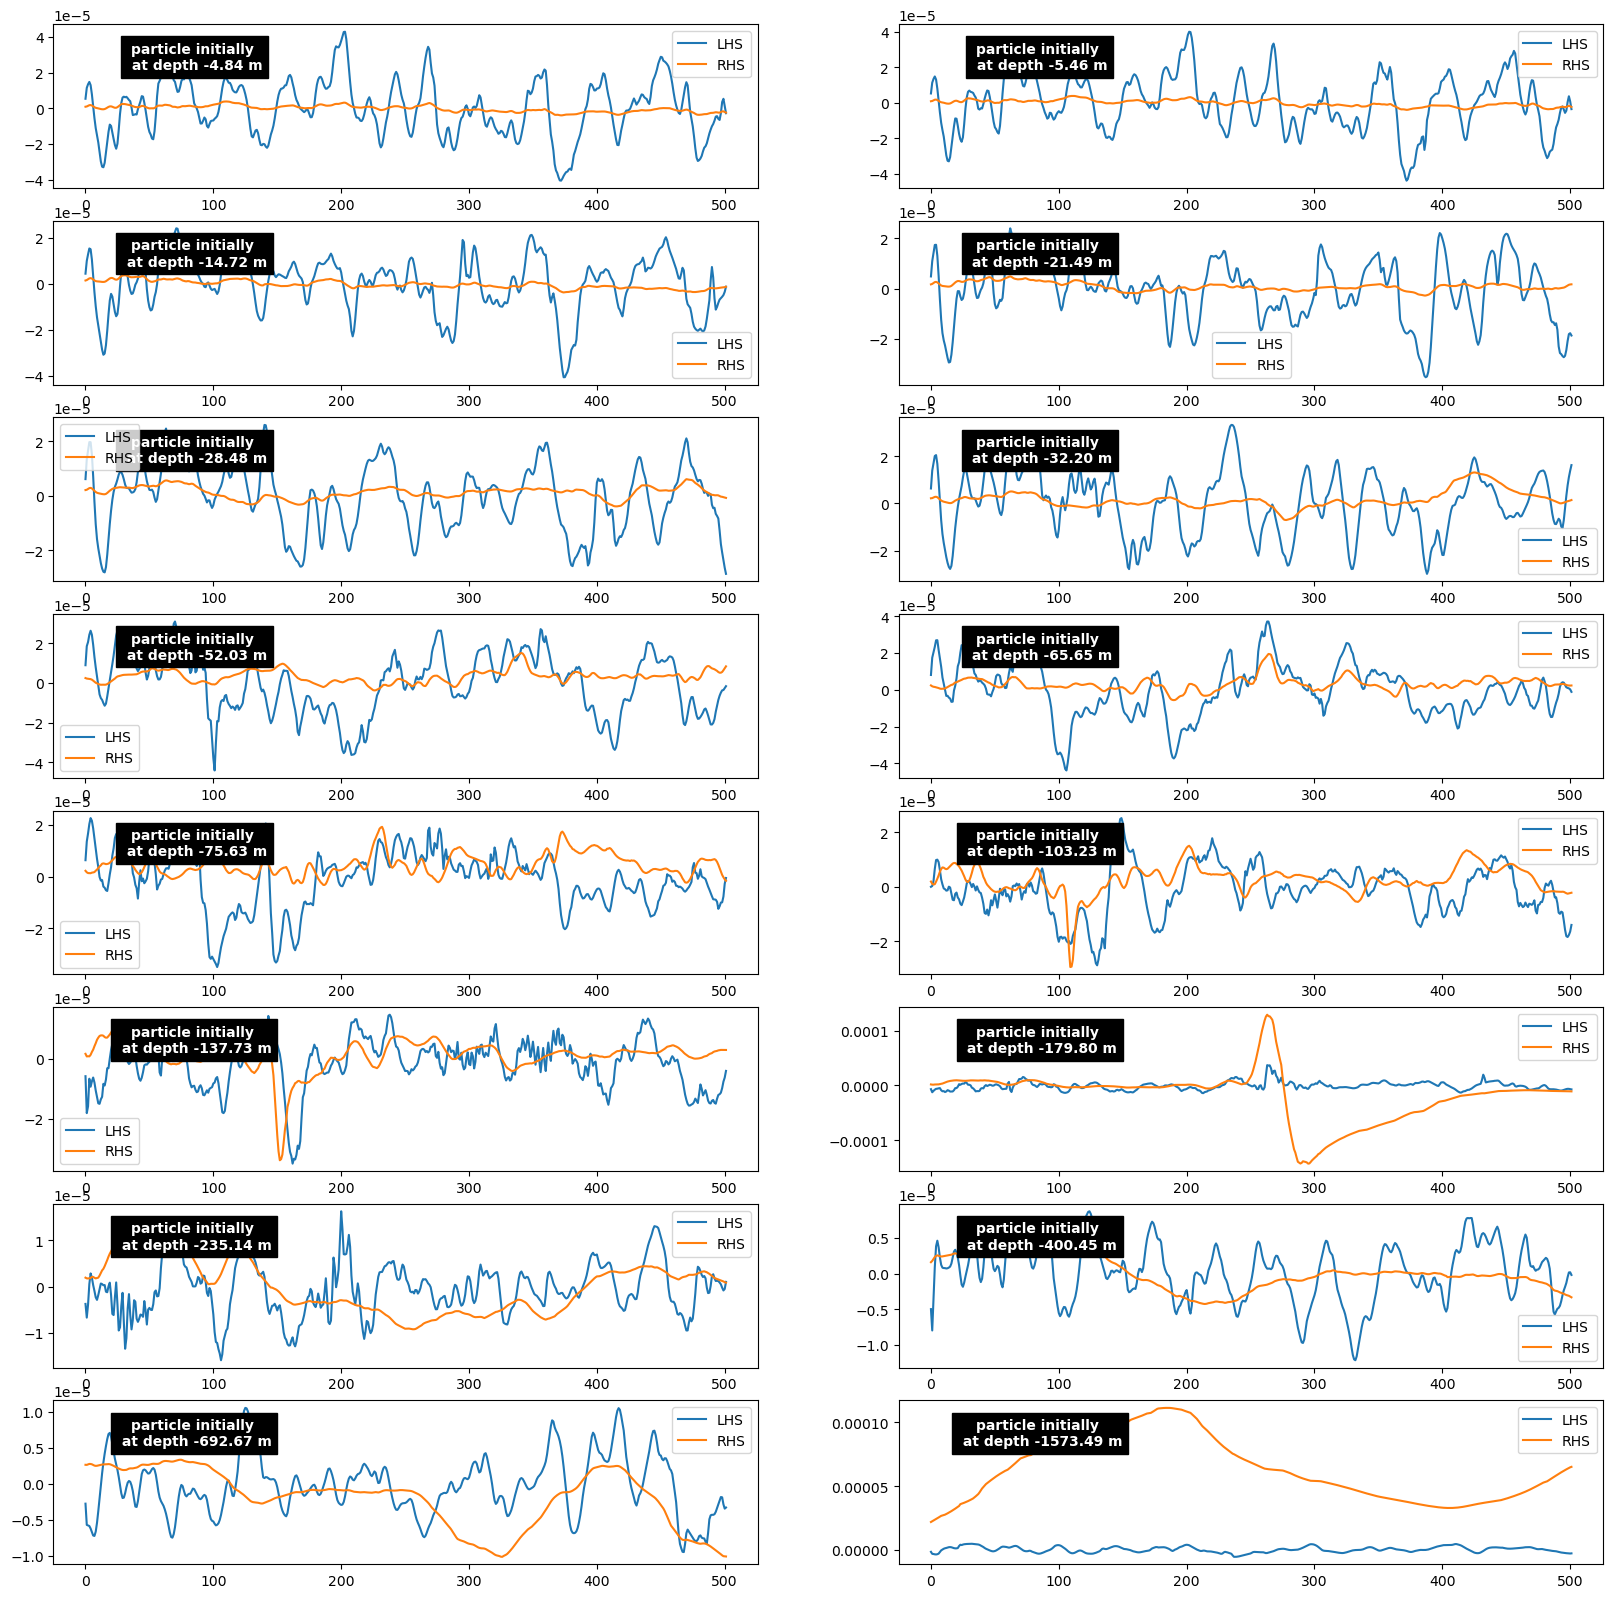

In [8]:
D_Dt_v = (np.roll(vo,-1,axis=0) - np.roll(vo,1,axis=0))[1:-1,:]/(3600*1/4)
presYgrad = -1/rho * dy_p 
yCoriolis = f*uo
RHS = presYgrad + yCoriolis
RHS = RHS[1:-1,:]
#RHS = (np.roll(RHS,-1,axis=0) + RHS)[1:-1,:]/2

fig, axes = plt.subplots(nrows = 8, ncols=2, figsize = (20,20) )
for i in range(16):
    ii = int(i//2)
    jj = i%2
    ax = axes[ii,jj]
    ax.plot(D_Dt_v[:,i], label = 'LHS')
    ax.plot(RHS[:,i], label = 'RHS')
    text = f'particle initially \n at depth {z[0,i]:5.2f} m'
    fig_x, fig_y = 0.2, 0.8
    ax.text(fig_x, fig_y, text, color ='white', horizontalalignment='center',
            weight='heavy', verticalalignment='center', transform=ax.transAxes,
            bbox=dict(facecolor='black', alpha=1))
    ax.legend()

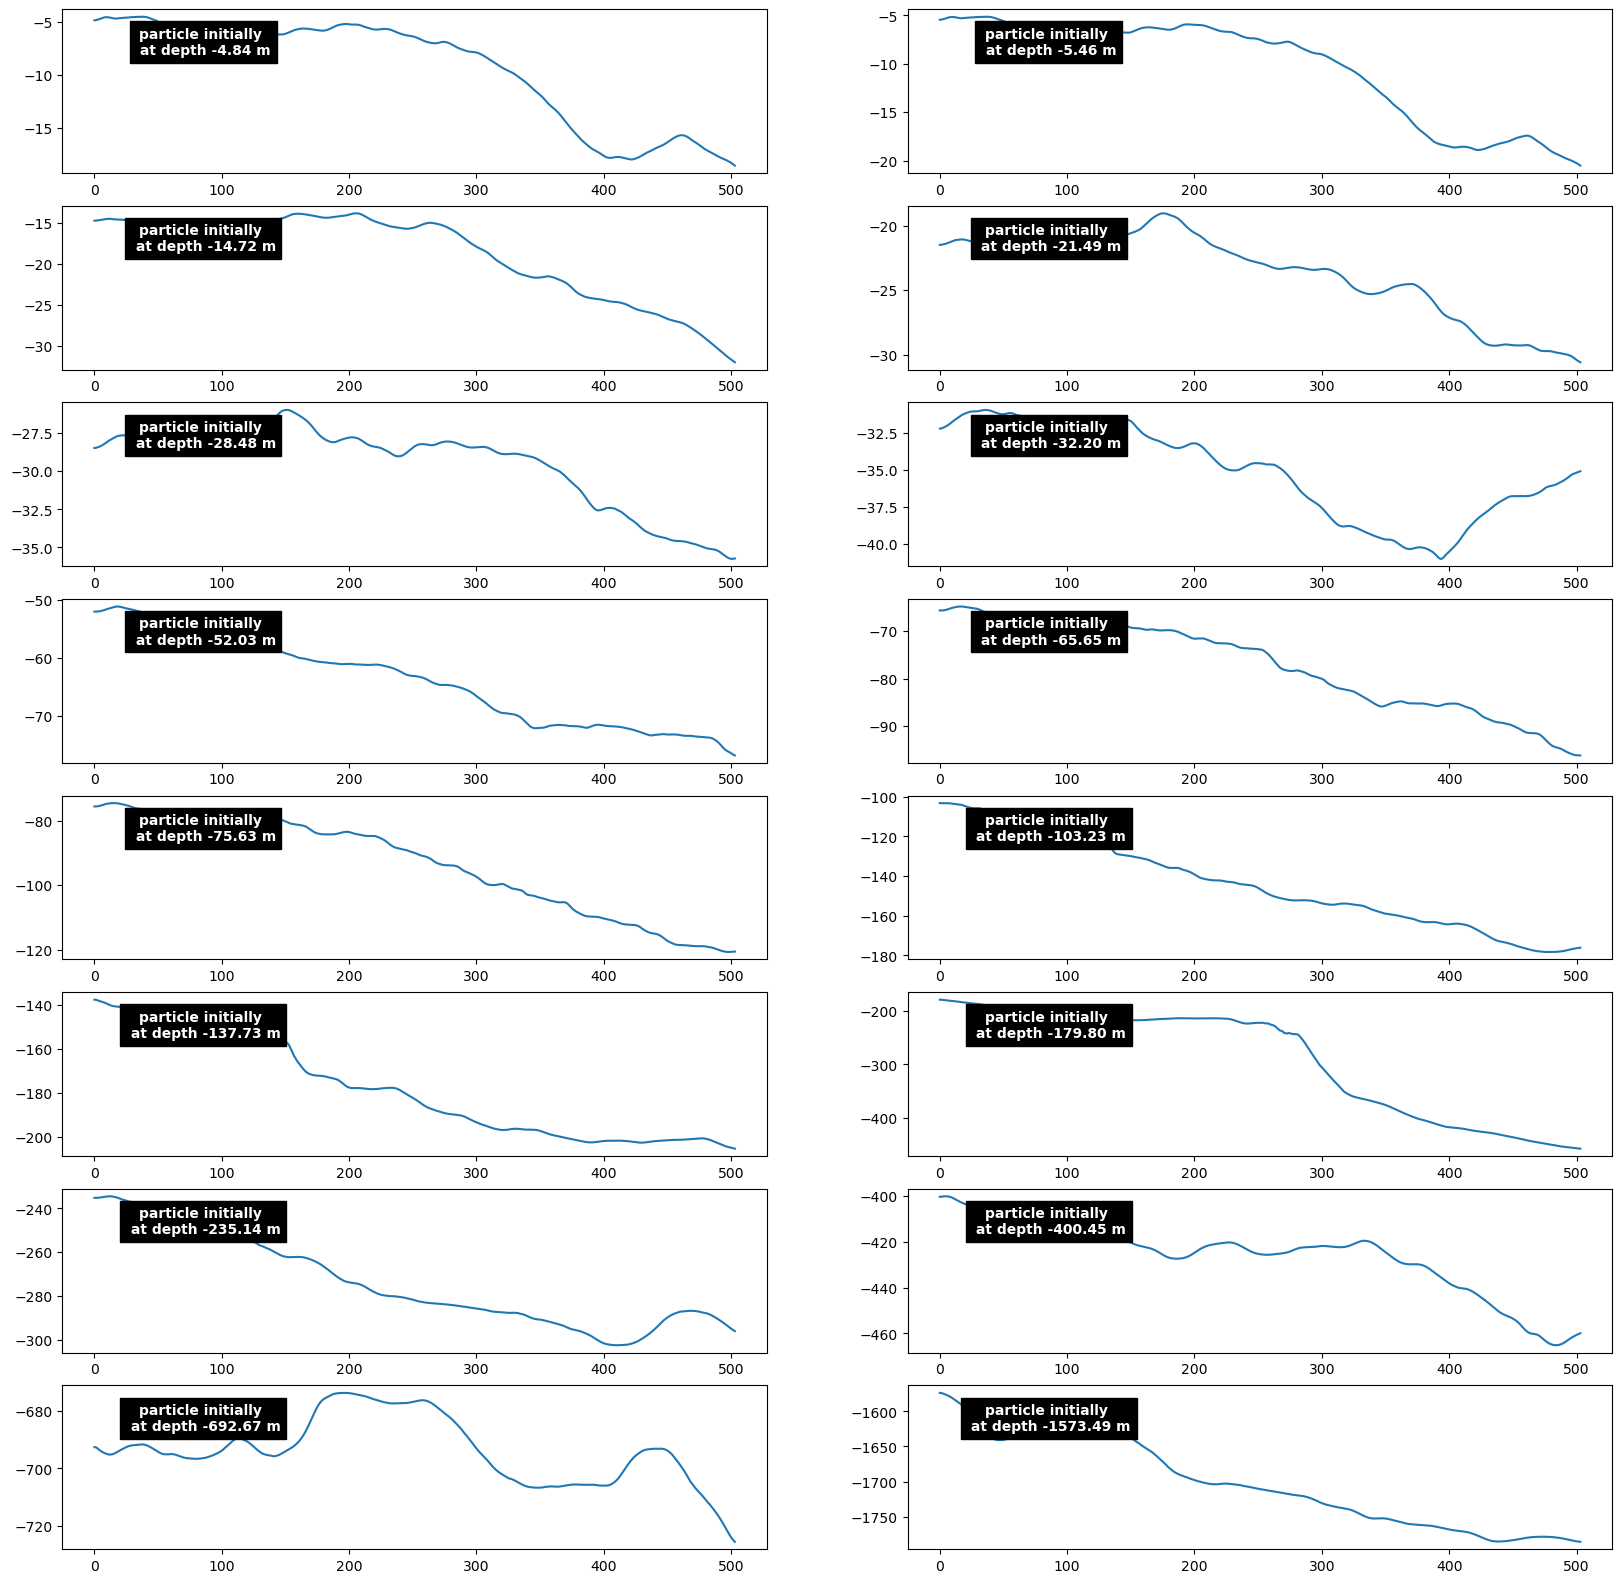

In [9]:
fig, axes = plt.subplots(nrows = 8, ncols=2, figsize = (20,20) )
for i in range(16):
    ii = int(i//2)
    jj = i%2
    ax = axes[ii,jj]
    ax.invert_yaxis()
    ax.plot(z[:,i])
    text = f'particle initially \n at depth {z[0,i]:4.2f} m'
    fig_x, fig_y = 0.2, 0.8
    ax.text(fig_x, fig_y, text, color ='white', horizontalalignment='center',
            weight='heavy', verticalalignment='center', transform=ax.transAxes,
            bbox=dict(facecolor='black', alpha=1))
    ax.invert_yaxis()

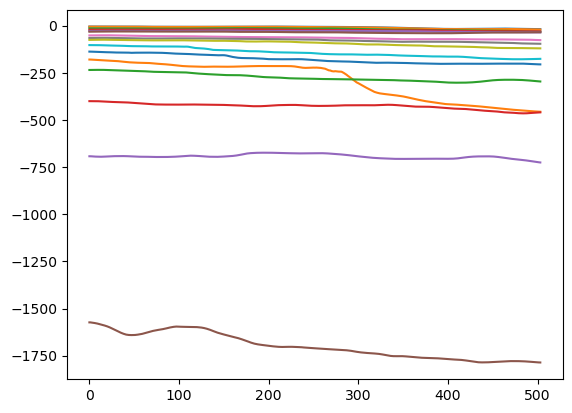

In [10]:
plt.plot(z[:,:])

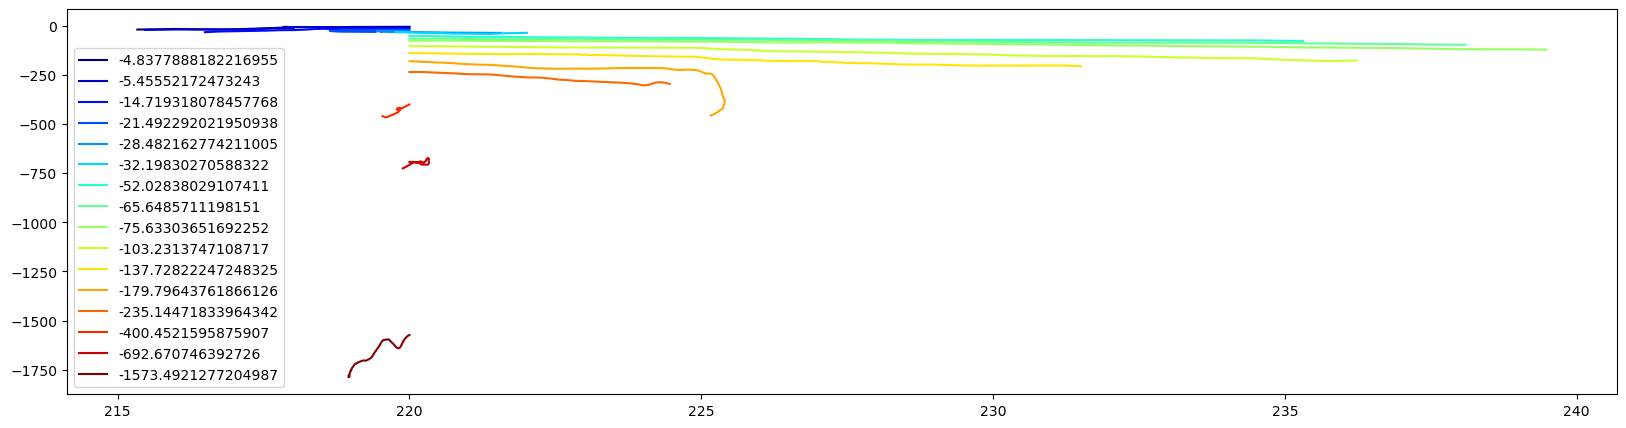

In [11]:
plt.figure(figsize = (20,5))
colors = plt.cm.jet(np.linspace(0,1,x.shape[1]))
for i in range(x.shape[1]):
    plt.plot(x[:,i],z[:,i], label = z[0,i], color=colors[i])
plt.legend()
#plt.scatter(x,y, c=p, s=1)